In [275]:
import wave
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

import librosa
import IPython.display as ipd
from IPython.display import Audio



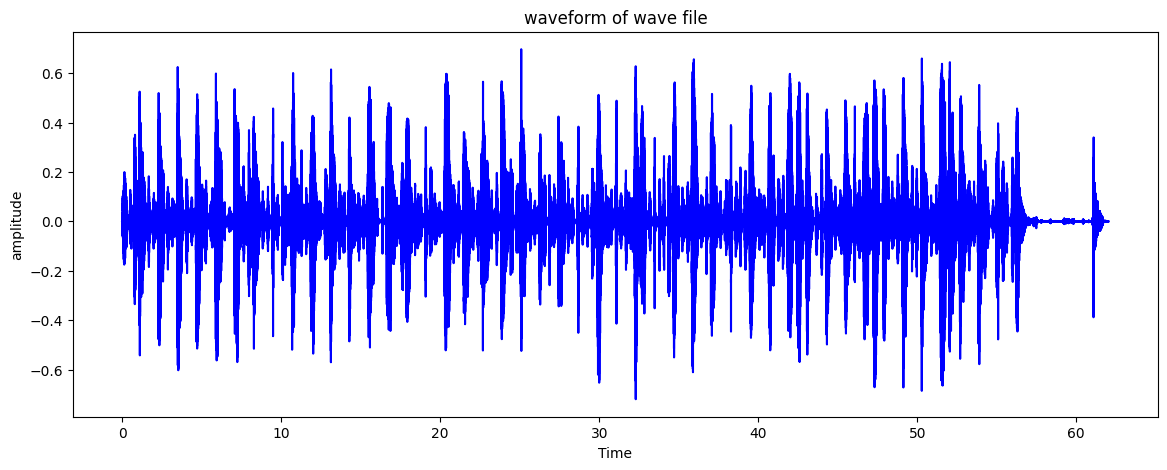

In [276]:
# wav=wave.open("S1.wav","r")

# raw=wav.readframes(-1)
# raw = np.frombuffer(raw,"int16")
# sample_rate=wav.getframerate()
# time=np.linspace(0,len(raw)/sample_rate,len(raw))
# if wav.getnchannels()==2:
#     print("stero not support")
#     sys.exit(0)

x,sr=librosa.load("C:\\Users\\Anwar\\Desktop\\SBME 2024\\YEAR 3 (2022-2023)\\DSP\\Tasks\\Task 2\DSP_Task2\\Media\\abc_no_music.wav")
t=np.array(range(0,len(x)))/sr
plt.figure(figsize=(14,5))

plt.title("waveform of wave file")
plt.plot(t,x , color="blue")
plt.xlabel("Time")
plt.ylabel("amplitude")
plt.show()


In [277]:
ipd.Audio(x,rate=sr)


In [278]:

y= np.fft.fft(x)
len(y)


1367761

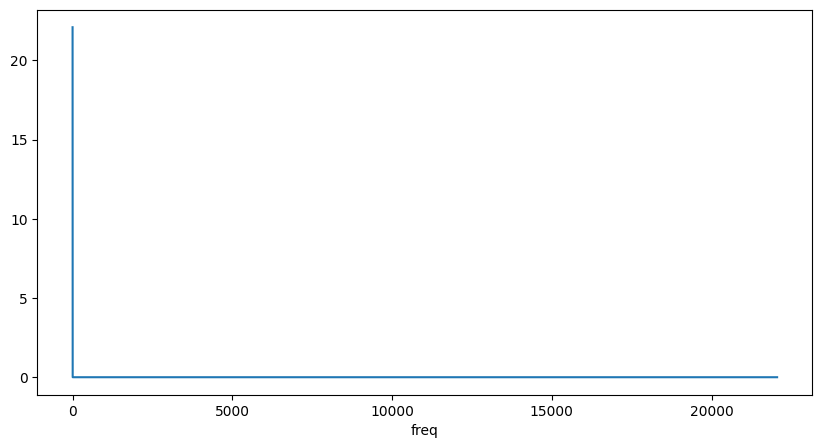

In [279]:
tpCount     = len(x)

values      = np.arange(int(tpCount))

timePeriod  = tpCount/sr

frequencies = values/timePeriod
# fr=np.array(range(0,len(x)))/4
plt.figure(figsize=(10,5))
plt.xlabel('freq')
condition=(frequencies>0)& (frequencies<25000)
y[condition]=y[condition]*0

plt.plot(frequencies,np.abs(y))

In [280]:
print(len(y))

1367761


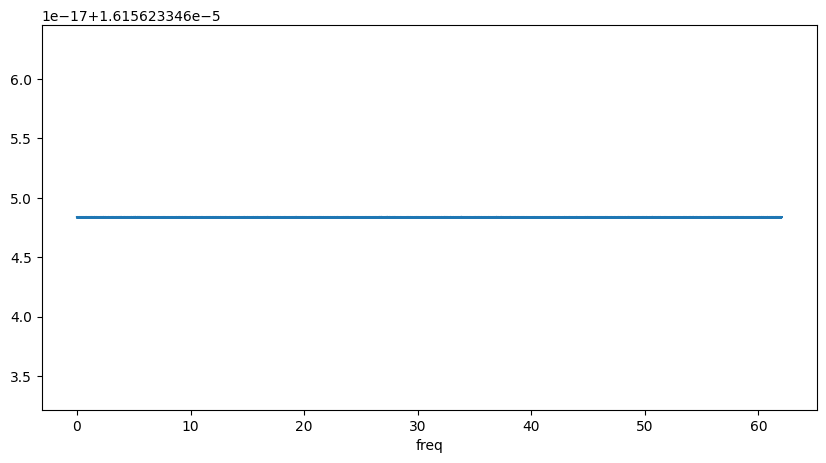

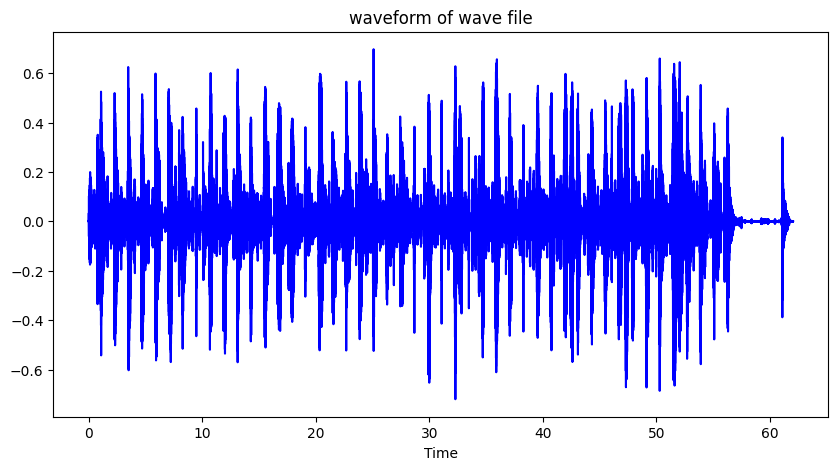

In [281]:
inverse=np.fft.ifft(y)
plt.figure(figsize=(10,5))
plt.xlabel('freq')
plt.plot(t,inverse)
plt.show()

plt.figure(figsize=(10,5))
plt.title("waveform of wave file")
plt.plot(t,x , color="blue")
plt.xlabel("Time")
# plt.ylabel("amplitude")
plt.show()

ipd.Audio(inverse,rate=sr)


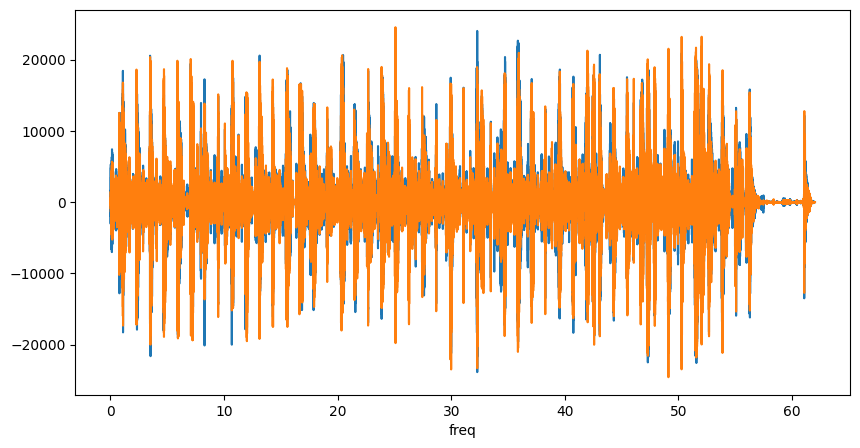

C:\Users\Anwar\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


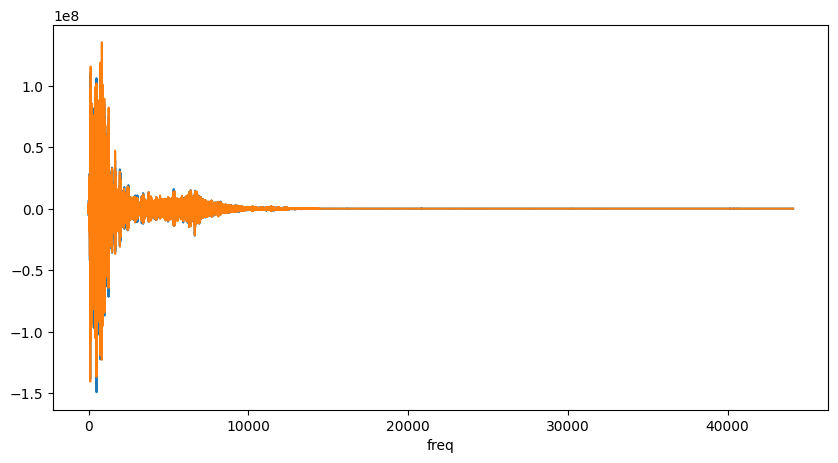

[[-7.00005473e+00  1.80000691e+01]
 [-4.99994794e+00  2.29999457e+01]
 [-3.00005317e+00  2.50000740e+01]
 ...
 [ 1.00005495e+00 -2.00006654e+00]
 [-5.33961110e-05 -1.99993488e+00]
 [ 5.39697462e-05 -1.00006757e+00]]


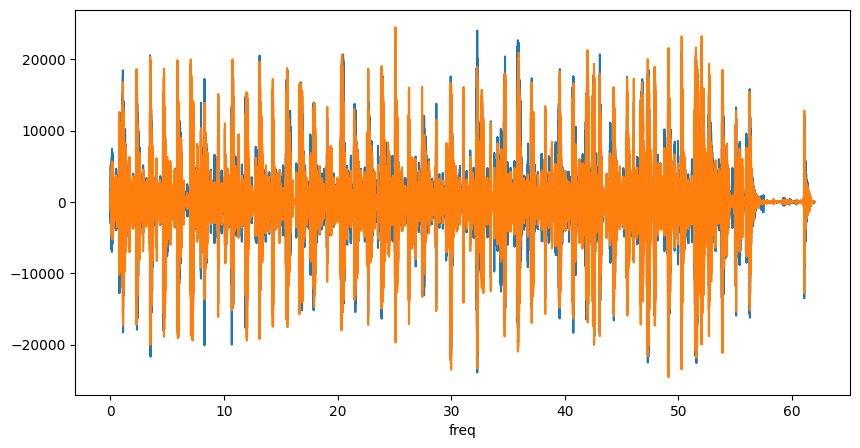

error: ushort format requires 0 <= number <= 0xffff

In [294]:
import IPython.display as ipd
from IPython.display import Audio
import scipy
import wave
import struct
import numpy
import pylab

from scipy.io import wavfile

rate, data = wavfile.read('C:\\Users\\Anwar\\Desktop\\SBME 2024\\YEAR 3 (2022-2023)\\DSP\\Tasks\\Task 2\\DSP_Task2\\Media\\abc_no_music.wav')
timeS=np.array(range(0,len(data)))/rate

plt.figure(figsize=(10,5))
plt.xlabel('freq')
plt.plot(timeS,data)
plt.show()

filtereddata = numpy.fft.rfft(data, axis=0)
# print(data)
tpCount1     = len(filtereddata)

values1      = np.arange(int(tpCount1))

timePeriod1  = tpCount1/rate

frequencies1 = values1/timePeriod1

plt.figure(figsize=(10,5))
plt.xlabel('freq')
plt.plot(frequencies1,filtereddata)
plt.show()

filteredwrite = numpy.fft.irfft(filtereddata, axis=0)
print(filteredwrite)
filteredwrite = numpy.round(filteredwrite).astype('int16')
wavfile.write('TestFiltered.wav', rate, filteredwrite)

plt.figure(figsize=(10,5))
plt.xlabel('freq')
plt.plot(timeS[1:],filteredwrite)
plt.show()

ipd.Audio(filteredwrite,rate=rate)
ipd.Audio(data,rate=rate)